In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (rescale = 1./255, shear_range= 0.2,zoom_range= 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator (rescale = 1)

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (rescale = 1./255,zoom_range= 0.2, horizontal_flip = True,vertical_flip=False)
test_datagen = ImageDataGenerator (rescale = 1./225)

In [16]:
from google.colab import files

In [20]:
uploaded=files.upload()

Saving Veg-dataset.zip to Veg-dataset.zip


In [21]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
for fn in uploaded.keys():
  print('user uploaded file "{name}" with length {length} bytes'.format (name=fn, length=len(uploaded[fn])))

user uploaded file "Veg-dataset.zip" with length 237004820 bytes


In [23]:
!unzip drive/"My Drive"/images.zip

unzip:  cannot find or open drive/My Drive/images.zip, drive/My Drive/images.zip.zip or drive/My Drive/images.zip.ZIP.


In [24]:
!unzip /content/Veg-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8914e04-4e33-4189-bfa9-f547e5f696d1___GCREC_Bact.Sp 3173.JPG  
  inflating: Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a64b79-e21e-4158-9d9d-47bd6e44fba0___GCREC_Bact.Sp 3594.JPG  
  inflating: Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a90b81-eb30-461d-80ba-4fa9c93f379d___GCREC_Bact.Sp 3757.JPG  
  inflating: Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8b6f17a-5189-47ae-904f-be4a09dce0ad___UF.GRC_BS_Lab Leaf 9009.JPG  
  inflating: Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d2baf6-87de-43e5-bd40-48dfe33841d3___GCREC_Bact.Sp 5747.JPG  
  inflating: Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d3c759-4242-42c0-9be5-b3177f2664be___GCREC_Bact.Sp 5953.JPG  
  inflating: Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d99dae-78a8-46f4-b7ad-600e0685d592___GCREC_Bact.Sp 6136.JPG  

In [26]:
x_train = train_datagen.flow_from_directory('Veg-dataset/Veg-dataset/train_set',target_size=(128,127),batch_size=32,class_mode='categorical')

Found 11386 images belonging to 9 classes.


In [27]:
x_test = test_datagen.flow_from_directory('Veg-dataset/Veg-dataset/test_set',target_size=(128,127),batch_size=32,class_mode='categorical')

Found 3416 images belonging to 9 classes.


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [29]:
model=Sequential()

In [30]:
model.add(Convolution2D(32,(3,3),input_shape=(128,127,3),activation='relu'))


In [31]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 125, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 62, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 124992)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [32]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [36]:
model.add(Dense (9, activation='softmax')) 
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
len(x_train)

356

In [37]:
1238/24

51.583333333333336

In [38]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
356/356 [==============================] - 178s 497ms/step - loss: 2.1361 - accuracy: 0.1673 - val_loss: 2.1101 - val_accuracy: 0.1754
Epoch 2/10
356/356 [==============================] - 178s 500ms/step - loss: 2.0858 - accuracy: 0.1673 - val_loss: 2.0886 - val_accuracy: 0.1953
Epoch 3/10
356/356 [==============================] - 177s 497ms/step - loss: 2.0765 - accuracy: 0.1868 - val_loss: 2.0846 - val_accuracy: 0.1953
Epoch 4/10
356/356 [==============================] - 176s 493ms/step - loss: 2.0745 - accuracy: 0.1868 - val_loss: 2.0835 - val_accuracy: 0.1953
Epoch 5/10
356/356 [==============================] - 176s 494ms/step - loss: 2.0738 - accuracy: 0.1868 - val_loss: 2.0835 - val_accuracy: 0.1953
Epoch 6/10
356/356 [==============================] - 176s 493ms/step - loss: 2.0735 - accuracy: 0.1868 - val_loss: 2.0833 - val_accuracy: 0.1953
Epoch 7/10
356/356 [==============================] - 176s 494ms/step - loss: 2.0733 - accuracy: 0.1868 - val_loss: 2.0831 -

In [39]:
model.save('vegetabledata.h5')

In [40]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model = load_model ('vegetabledata.h5')

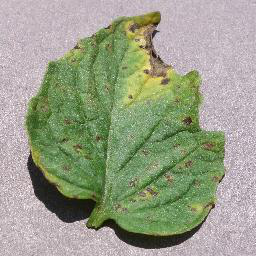

In [42]:
img=image.load_img(r"/content/Veg-dataset/Veg-dataset/train_set/Tomato___Septoria_leaf_spot/fb813bed-8f8e-4e2a-8efb-9bccc1dd3661___Matt.S_CG 6595.JPG")
img

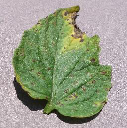

In [43]:
img=image.load_img(r"/content/Veg-dataset/Veg-dataset/train_set/Tomato___Septoria_leaf_spot/fb813bed-8f8e-4e2a-8efb-9bccc1dd3661___Matt.S_CG 6595.JPG",target_size=(128,127))
img

In [44]:
x=image.img_to_array(img)

In [45]:
x

array([[[206., 193., 200.],
        [196., 183., 190.],
        [210., 197., 204.],
        ...,
        [191., 179., 189.],
        [193., 181., 191.],
        [191., 179., 189.]],

       [[199., 186., 193.],
        [205., 192., 199.],
        [202., 189., 196.],
        ...,
        [200., 188., 198.],
        [186., 174., 184.],
        [192., 180., 190.]],

       [[211., 198., 205.],
        [208., 195., 202.],
        [208., 195., 202.],
        ...,
        [201., 189., 199.],
        [199., 187., 197.],
        [209., 197., 207.]],

       ...,

       [[184., 172., 176.],
        [194., 182., 186.],
        [200., 188., 192.],
        ...,
        [202., 189., 198.],
        [179., 166., 175.],
        [173., 160., 169.]],

       [[194., 182., 186.],
        [212., 200., 204.],
        [199., 187., 191.],
        ...,
        [179., 166., 175.],
        [167., 154., 163.],
        [203., 190., 199.]],

       [[174., 162., 166.],
        [179., 167., 171.],
        [193., 1

In [46]:
x=np.expand_dims(x,axis=0)

In [47]:
x

array([[[[206., 193., 200.],
         [196., 183., 190.],
         [210., 197., 204.],
         ...,
         [191., 179., 189.],
         [193., 181., 191.],
         [191., 179., 189.]],

        [[199., 186., 193.],
         [205., 192., 199.],
         [202., 189., 196.],
         ...,
         [200., 188., 198.],
         [186., 174., 184.],
         [192., 180., 190.]],

        [[211., 198., 205.],
         [208., 195., 202.],
         [208., 195., 202.],
         ...,
         [201., 189., 199.],
         [199., 187., 197.],
         [209., 197., 207.]],

        ...,

        [[184., 172., 176.],
         [194., 182., 186.],
         [200., 188., 192.],
         ...,
         [202., 189., 198.],
         [179., 166., 175.],
         [173., 160., 169.]],

        [[194., 182., 186.],
         [212., 200., 204.],
         [199., 187., 191.],
         ...,
         [179., 166., 175.],
         [167., 154., 163.],
         [203., 190., 199.]],

        [[174., 162., 166.],
       

In [48]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 129ms/step


In [50]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [51]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight']

In [56]:
index[y[0]]

'Tomato___Bacterial_spot'

In [58]:
img=image.load_img(r"/content/Veg-dataset/Veg-dataset/train_set/Tomato___Septoria_leaf_spot/fb813bed-8f8e-4e2a-8efb-9bccc1dd3661___Matt.S_CG 6595.JPG")
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight']
index[y[0]]

'Tomato___Bacterial_spot'